In [14]:
from torchvision import datasets

data_path = "imgs/ch7/"
cifar10 = datasets.CIFAR10(data_path, train=True, download=True)
cifar10_validation = datasets.CIFAR10(data_path, train=False, download=True)

Files already downloaded and verified
Files already downloaded and verified


In [15]:
type(cifar10).__mro__

(torchvision.datasets.cifar.CIFAR10,
 torchvision.datasets.vision.VisionDataset,
 torch.utils.data.dataset.Dataset,
 typing.Generic,
 object)

In [16]:
len(cifar10)

50000

In [17]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
img, label = cifar10[99]
(img, label, class_names[label])

(<PIL.Image.Image image mode=RGB size=32x32>, 1, 'automobile')

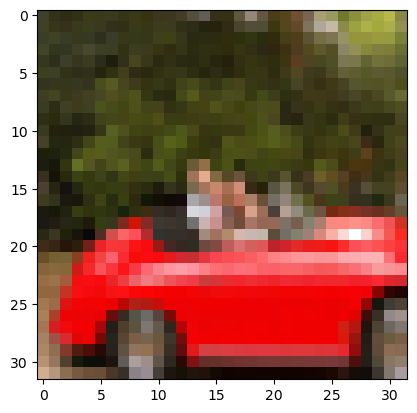

In [18]:
import matplotlib.pyplot as plt
plt.imshow(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9802876..2.1264887].


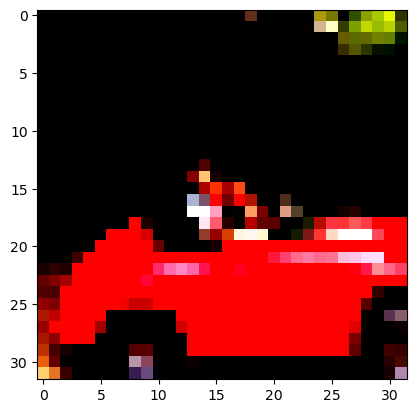

In [19]:
import torchvision.transforms as transforms

transformed_cifar10 = datasets.CIFAR10(
    data_path,
    train=True,
    download=False,
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465),(0.2470, 0.2435, 0.2616))
    ])
)

img_t, _ = transformed_cifar10[99]

plt.imshow(img_t.permute(1, 2, 0));

In [20]:
label_map = {0: 0, 2: 1}
class_names = ['airplane', 'bird']
cifar2 = [(img, label_map[label])
          for img, label in cifar10
          if label in [0, 2]]
cifar2_val = [(img, label_map[label])
              for img, label in cifar10_validation
              if label in [0, 2]]
len(cifar2), len(cifar2_val)

(10000, 2000)

In [21]:
label_map = {0: 0, 2: 1}
class_names = ['airplane', 'bird']
cifar2 = [(img, label_map[label])
          for img, label in cifar10
          if label in [0, 2]]
cifar2_val = [(img, label_map[label])
              for img, label in cifar10_validation
              if label in [0, 2]]
len(cifar2), len(cifar2_val)

(10000, 2000)

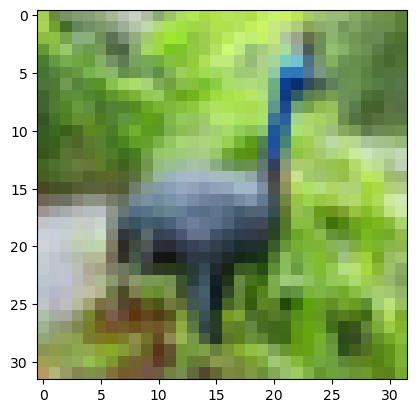

In [22]:
testImg, _ = cifar2[0]
plt.imshow(testImg)

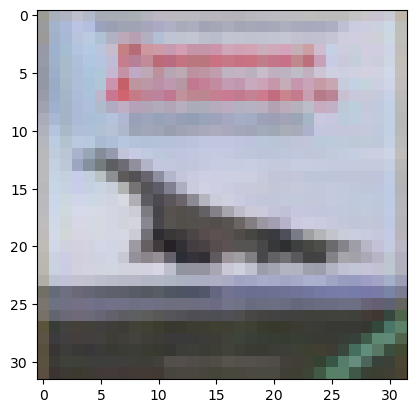

In [23]:
testImg, _ = cifar2_val[0]
plt.imshow(testImg)

In [24]:
import torch.nn as nn

n_out = 2
model = nn.Sequential(
    nn.Linear(3072, 512),
    nn.Tanh(),
    nn.Linear(512, n_out),
)
model

Sequential(
  (0): Linear(in_features=3072, out_features=512, bias=True)
  (1): Tanh()
  (2): Linear(in_features=512, out_features=2, bias=True)
)

In [25]:
import torch

def softmax(x):
    return torch.exp(x) / torch.exp(x).sum()

x = torch.tensor([1.0, 2.0, 3.0])
softmax(x), softmax(x).sum()

(tensor([0.0900, 0.2447, 0.6652]), tensor(1.))

In [26]:
softmax1 = nn.Softmax(dim=1)
x = torch.tensor([[1.0, 2.0, 3.0],
                  [1.0, 2.0, 3.0]])
softmax1(x)

tensor([[0.0900, 0.2447, 0.6652],
        [0.0900, 0.2447, 0.6652]])

In [27]:
softmax1 = nn.Softmax(dim=0)
x = torch.tensor([[1.0, 2.0, 3.0],
                  [1.0, 2.0, 3.0]])
softmax1(x)

tensor([[0.5000, 0.5000, 0.5000],
        [0.5000, 0.5000, 0.5000]])

In [ ]:
transformed_cifar10 = datasets.CIFAR10(data_path,
                                       train=True,
                                       download=False,
                                       transform=transforms.Compose([
                                           transforms.ToTensor(),
                                           transforms.Normalize(imgs_mean, imgs_std)
                                       ]))

transformed_cifar10_validation = datasets.CIFAR10(data_path,
                                                  train=False,
                                                  download=False,
                                                  transform=transforms.Compose([
                                                      transforms.ToTensor(),
                                                      transforms.Normalize(imgs_mean, imgs_std)
                                                  ]))

NameError: name 'imgs_mean' is not defined

In [ ]:
img, _ = cifar2[0]
img_batch = img.view(-1).unsqueeze(0)
plt.imshow(img.permute(1, 2, 0))

AttributeError: 'Image' object has no attribute 'view'